Student Names: Shreyash Shashikant Kumbhar, Sarthak Santosh Shinde <br>
Student IDs: 21263426, 21261592 <br>
Student Email IDs: shreyash.kumbhar2@mail.dcu.ie, sarthak.shinde4@mail.dcu.ie <br>
Subject: Data Analytics and Data Mining <br>
Lecturer: Andrew Mccarren <br>
College: Dublin City University <br>

# California Housing Price Prediction

**Research Question**<br>
* Is linear regression the correct method for developing models that can predict house prices? 

**Analysis Steps are as follows:** <br>
        1. Importing Libraries <br>
        2. Data Cleaning, Preparation, EDA <br>
        3. Data Mining Algorithms <br>

## 1. Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
dfhousing = pd.read_csv("housing.csv")
dfhousing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
dfhousing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
dfhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Only "ocean_proximity" is non-numerical, and "total_bedrooms" has some null values.

##  2. Data Cleaning, Preparation, EDA 

Using the mean to replace all of the null values

In [ ]:
dfhousing = dfhousing.fillna(dfhousing.mean())
dfhousing.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [ ]:
dfhousing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

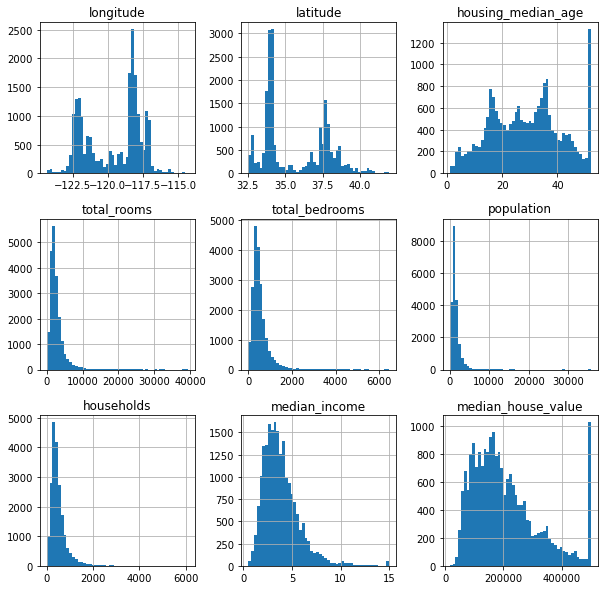

In [ ]:
dfhousing.hist(bins=50, figsize=(10,10))

With a histogram, we can see the trend of our values. For a better visualization of this example, we can also use a boxplot.

<AxesSubplot:>

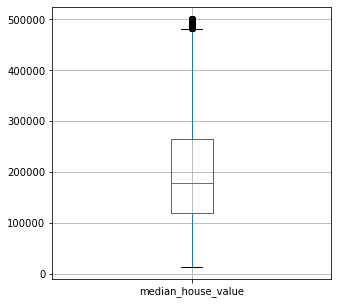

In [ ]:
#boxplot
dfhousing.boxplot(['median_house_value'], figsize=(5, 5)) 

The green line shows the average house value. In the histogram, since there is no numerical value, we cannot see the proximity to the ocean. 

With houses near the ocean, we can make a count.

C:\Users\vrushali\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


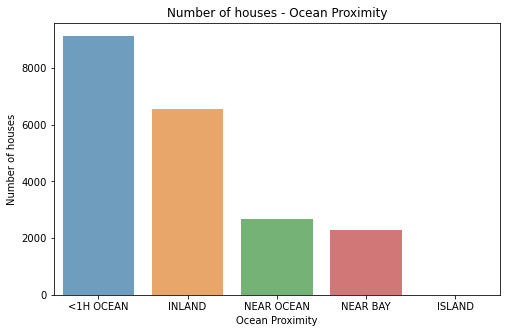

In [ ]:
ocean_prox = dfhousing['ocean_proximity'].value_counts() 
plt.figure(figsize=(8,5))
sns.barplot(ocean_prox.index, ocean_prox.values, alpha=0.7) 
plt.title('Number of houses - Ocean Proximity')
plt.ylabel('Number of houses')
plt.xlabel('Ocean Proximity')
plt.show()

Plotting the data on longitude and latitude

Text(0.5, 1.0, 'Population number by area colored according to house values')

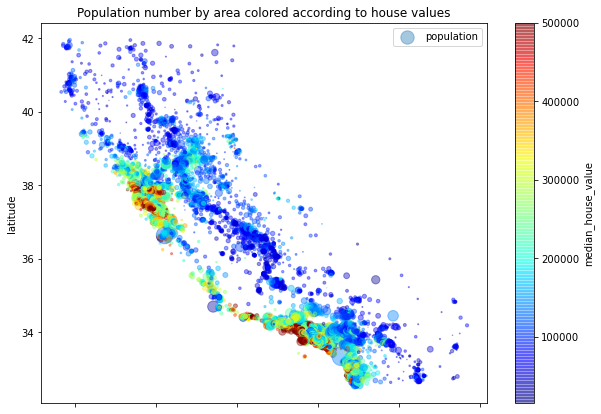

In [ ]:
dfhousing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, 
    s=dfhousing['population']/100, 
        label='population', figsize=(10,7), 
    c='median_house_value',
        cmap=plt.get_cmap('jet'), colorbar=True)
plt.xticks()
plt.yticks()
plt.title('Population number by area colored according to house values')

Heatmap for correlation

<AxesSubplot:>

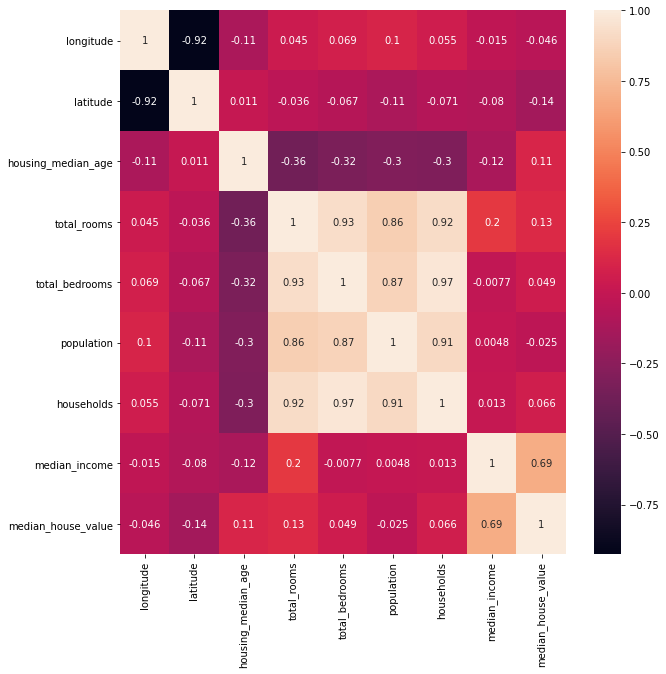

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(dfhousing.corr(), annot=True) 

Fixing the ocean_proximity column because it is not numerical.

In [ ]:
dfhousing_ocean = pd.get_dummies(dfhousing.ocean_proximity)
dfhousing[dfhousing_ocean.columns] = dfhousing_ocean 
dfhousing = dfhousing.drop('ocean_proximity', axis=1) 
dfhousing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


### Exploratory Data Analysis

C:\Users\vrushali\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='median_house_value', ylabel='Density'>

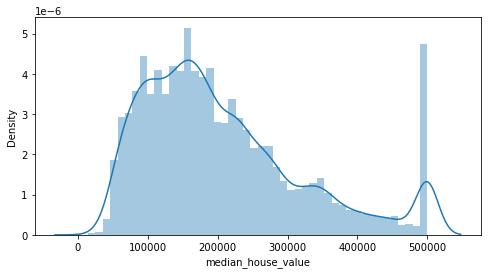

In [ ]:
plt.figure(figsize=(8,4))
sns.distplot(dfhousing['median_house_value'])

<AxesSubplot:xlabel='median_house_value', ylabel='longitude'>

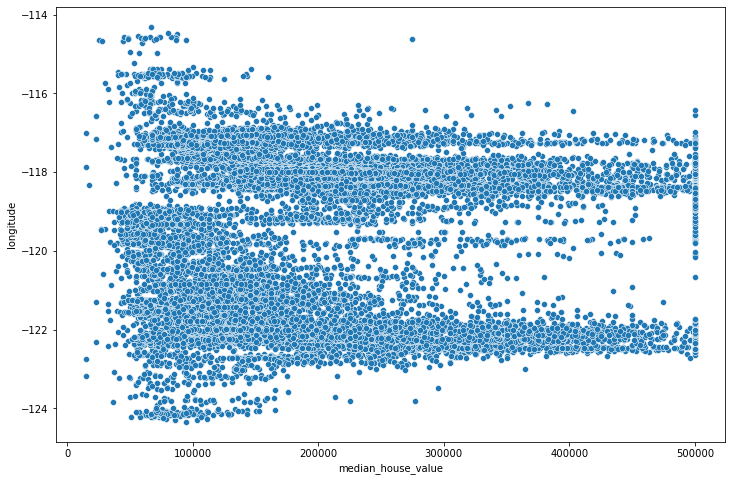

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='median_house_value',y='longitude',data=dfhousing)

<AxesSubplot:xlabel='median_house_value', ylabel='latitude'>

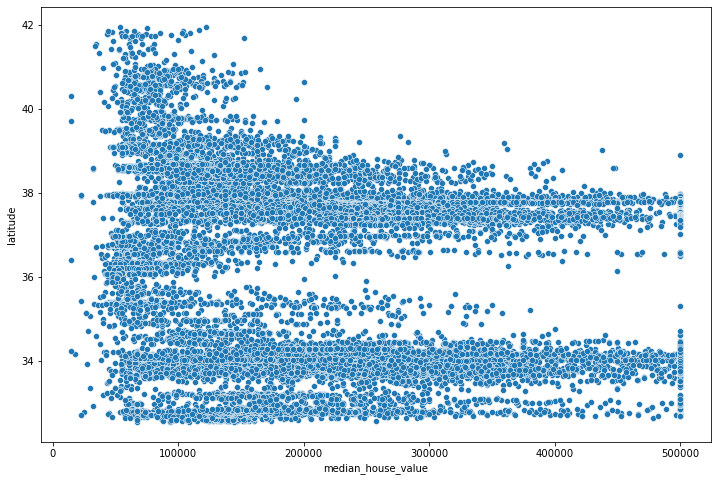

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='median_house_value',y='latitude',data=dfhousing)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

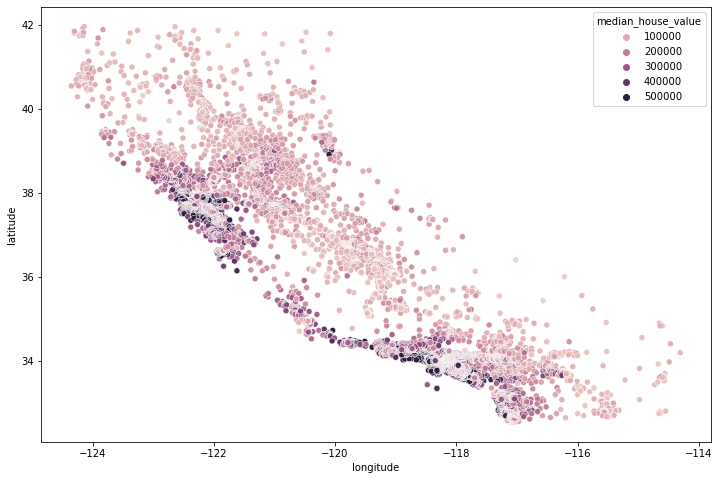

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='longitude',y='latitude',data=dfhousing,hue='median_house_value')

# 3. Data Mining Algorithms 

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, GridSearchCV, StratifiedKFold
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
X = dfhousing.drop ('median_house_value', axis=1)
y = dfhousing.median_house_value
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=8)
kfold = KFold(n_splits=10, random_state=100, shuffle=True) 

In [ ]:
reg_linear = LinearRegression()
reg_linear.fit(X_train,y_train)
pred_linear = reg_linear.predict(X_test)
linear_score = r2_score(y_test, pred_linear)
linear_mse = mean_squared_error(y_test, pred_linear)
print('Mean Sqaured Error: %.2f' %linear_mse)
print('Score: %.2f' %linear_score)

Mean Sqaured Error: 4633061214.28
Score: 0.65


### Decision Tree Model

In [ ]:
params= {
    'max_depth':[10], #9,10,11,12,13,14,15
    'min_samples_split':[6], #4,5,6,7,8
    'min_samples_leaf':[4], #2,3,4,5,6,7
    'max_features':[10] #6,7,8,9,10,11,12
        }
reg_tree = DecisionTreeRegressor()
gs = GridSearchCV(estimator=reg_tree, param_grid=params, cv=5, n_jobs=-1) 
gs.fit(X_train, y_train) 

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10], 'max_features': [10],
                         'min_samples_leaf': [4], 'min_samples_split': [6]})

In [ ]:
reg_tree = gs.best_estimator_
print(reg_tree) 
pred_tree = reg_tree.predict (X_test)

DecisionTreeRegressor(max_depth=10, max_features=10, min_samples_leaf=4,
                      min_samples_split=6)


In [ ]:
dt_score = r2_score(y_test, pred_tree)
dt_mse = mean_squared_error(y_test, pred_tree)
print('Mean Sqaured Error: %.2f' %dt_mse)
print('Score: %.2f' %dt_score)

Mean Sqaured Error: 3735625316.78
Score: 0.71


### Random Forest

In [ ]:
#scaling data for below models
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) #fitting and transform training data
X_test = scaler.transform(X_test) #transform test data

### KNN Regressor

In [ ]:
params={'n_neighbors': [11], #[3,4,5,6,7,8,9,10,11,12,13,14,15],
       'weights': ['distance'], #['uniform', 'distance'],
        'p':[1] #manhattan_distance, euclidean_distance
       }

reg_knn = KNeighborsRegressor()
gs =  GridSearchCV(estimator=reg_knn, param_grid=params,cv=10, n_jobs=-1) #validate model with his parameters
gs.fit(X_train, y_train)

reg_knn = gs.best_estimator_
print(reg_knn) #printing best estimator values

pred_knn =reg_knn.predict(X_test)

knn_score = r2_score(y_test,pred_knn)
knn_mse = mean_squared_error(y_test, pred_knn)
print('Mean Sqaured Error: %.2f' %knn_mse)
print('Score: %.2f' %knn_score)

KNeighborsRegressor(n_neighbors=11, p=1, weights='distance')
Mean Sqaured Error: 3465499960.10
Score: 0.73


### SVR

In [ ]:
params= {
    'kernel': ['linear'], #['poly', 'rbf', 'sigmoid'],
    'epsilon': [1.0],
    'C': [100]
        }

reg_svr = SVR()
gs = GridSearchCV(reg_svr,params, cv=5, n_jobs=-1) #validation for Random Forest
gs.fit (X_train, y_train)
reg_svr=gs.best_estimator_
print(reg_svr)

pred_svr = reg_svr.predict (X_test)
svr_score = r2_score(y_test, pred_svr)
svr_mse = mean_squared_error(y_test, pred_svr)
print('Mean Sqaured Error: %.2f' %svr_mse)
print('Score: %.2f' %svr_score)

SVR(C=100, epsilon=1.0, kernel='linear')
Mean Sqaured Error: 5014318814.65
Score: 0.62


To compare the best ML model, we have to compare the evaluation metrics of the various models.

In [ ]:
data = [[linear_score, linear_mse], [knn_score, knn_mse], [dt_score, dt_mse ], [svr_score, svr_mse]]
index = ['Linear Regression', 'KNN Regression', 'Decision Tree Regressor', 'SVR Regressor']
pd.DataFrame(data, index=index, columns=['R2 score', 'MSE']).sort_values('R2 score',ascending = False)

,R2 score,MSE
KNN Regression,0.734501,3.465500e+09
Decision Tree Regressor,0.713806,3.735625e+09
Linear Regression,0.645052,4.633061e+09
SVR Regressor,0.615843,5.014319e+09


The KNN regression is a better model here than the other ML algorithms.